In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv('Superstore_USA.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9354 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

In [8]:
data.shape

(9426, 24)

In [9]:
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,5/28/2012,5/30/2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/7/2010,7/8/2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,7/27/2011,7/27/2011,998.2023,8,1446.67,88523


In [10]:
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [11]:
# filled the null values of 'Product Base Margin' column
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4848\248036947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product Base Margin'].fillna(data['Product Base Margin'].mean(),inplace=True)


In [12]:
data.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority

In [13]:
data['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [14]:
data['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [22]:
# to replace 'Critical ' to 'Critical' we perform data cleaning in excel
data['Order Priority'] = data['Order Priority'].replace('Critical ','Critical')

In [23]:
data['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

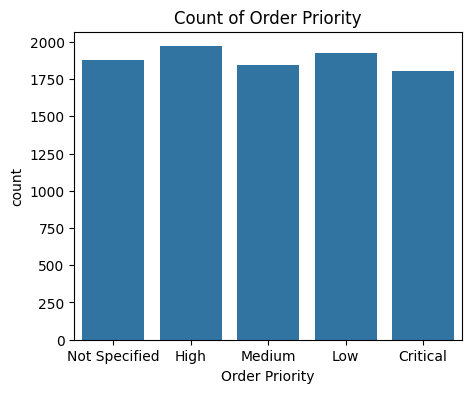

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Priority', data = data)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority")      # to save the graph only in png format

# Shipping Mode

In [29]:
data['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

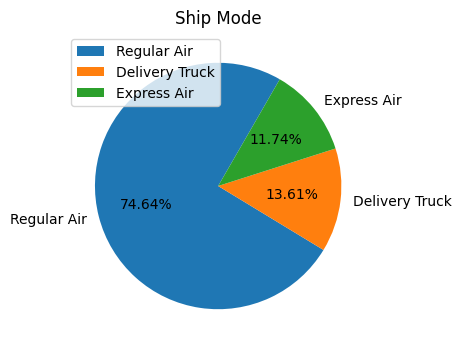

In [47]:
plt.figure(figsize=(5,4))
x= data['Ship Mode'].value_counts().index
y= data['Ship Mode'].value_counts().values
plt.pie(y,labels=x,startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)
plt.title('Ship Mode')
plt.savefig('Ship Mode')

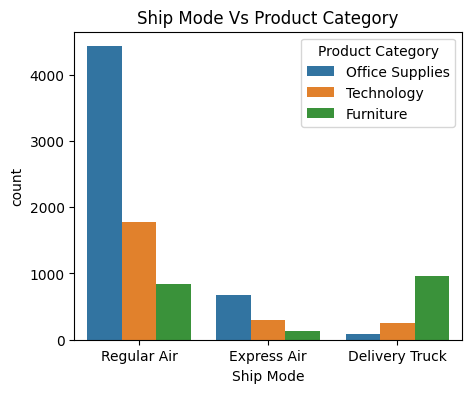

In [50]:
plt.figure(figsize=(5,4))
sns.countplot( x= 'Ship Mode',data = data,hue='Product Category')
plt.title('Ship Mode Vs Product Category')
plt.savefig('Ship Mode Vs Product Category')

# Customer Segment

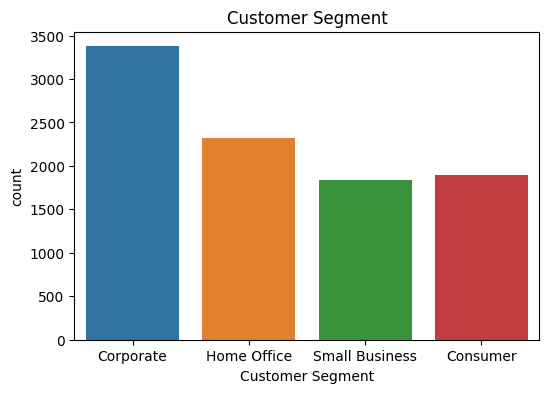

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'Customer Segment', data = data,hue='Customer Segment')
plt.title('Customer Segment')
plt.savefig('Customer Segment')

from above graph we can conclude that most of the customers are from corporate sector.

# Product Category

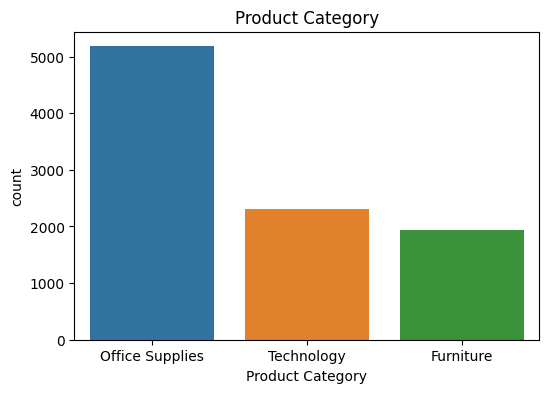

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'Product Category', data = data,hue='Product Category')
plt.title('Product Category')
plt.savefig('Product Category')

from above graph we can conclude that most of the product are sell from the category of Office Supplies.

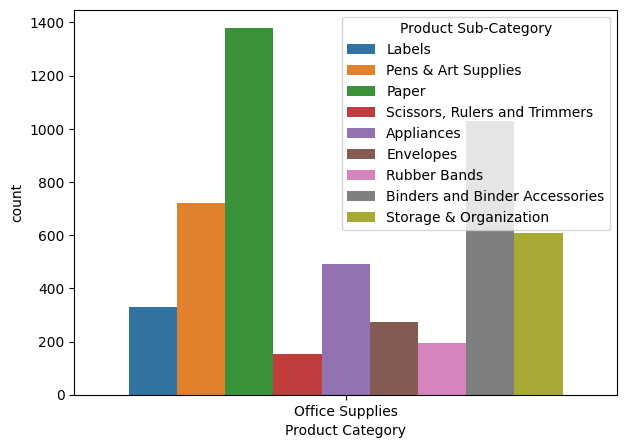

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Product Category', data = data[data['Product Category'] == "Office Supplies"],hue='Product Sub-Category')
#plt.title('Product Sub-Category : Office Supplies')
plt.savefig('Product Sub-Category Office Supplies')

From above graph we can conclude that most of the product sold from the sub-category Paper of Office Supplies Category.

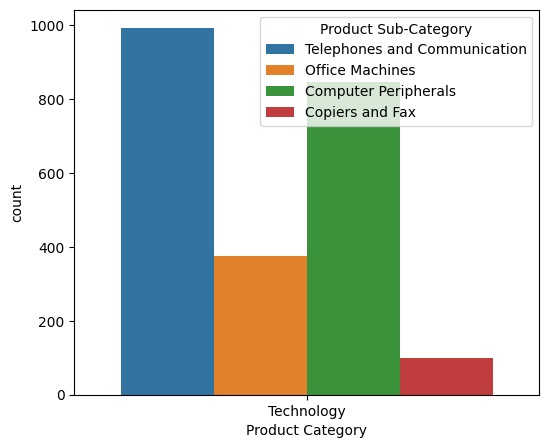

In [66]:
plt.figure(figsize=(6,5))
sns.countplot(x= 'Product Category', data = data[data['Product Category'] == "Technology"],hue='Product Sub-Category')
# plt.title('Product Sub-Category: Technology')
plt.savefig('Product Sub-Category Technology')

From above graph we can conclude that most of the product sold from the sub-category Telephone & Communication of Technology Category.

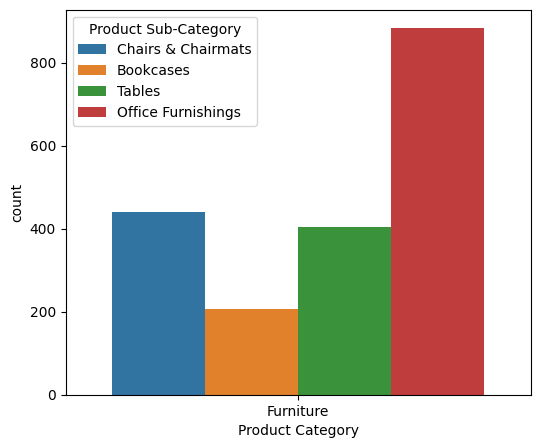

In [67]:
plt.figure(figsize=(6,5))
sns.countplot(x= 'Product Category', data = data[data['Product Category'] == "Furniture"],hue='Product Sub-Category')
# plt.title('Product Sub-Category: Furniture')
plt.savefig('Product Sub-Category Furniture')

From above graph we can conclude that most of the products sold from the sub-category Office Furnishings of Furniture Category.


# Profit

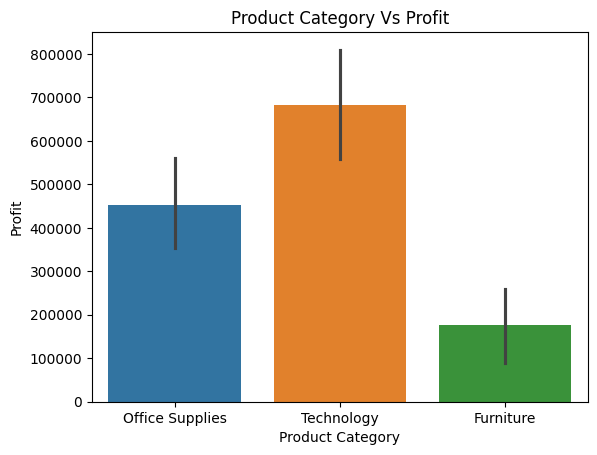

In [73]:
sns.barplot(x= 'Product Category', y = 'Profit', data = data, estimator= "sum",hue='Product Category')
plt.title('Product Category Vs Profit')
plt.savefig('Product Category Vs Profit')

From above graph we can conclude that most of the profit where from the Technology Category.

# States

In [74]:
data['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [75]:
data['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='Product Base Margin'>

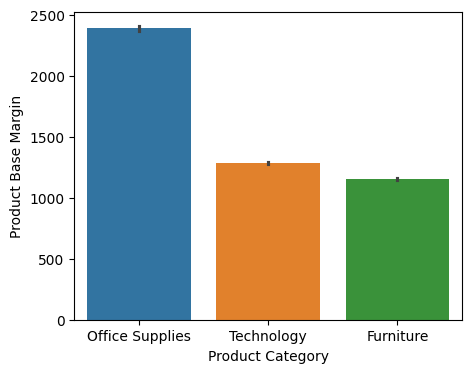

In [81]:
plt.figure(figsize=(5,4))
sns.barplot(x = "Product Category", y = "Product Base Margin", data = data,estimator="sum",hue='Product Category')

From above graph we can conclude that most of the products base margin where from the Office Supplies Category.